#### [ 미니 테스트  2024-03-14 ]<hr>

[1] 지도학습에 대한 설명과 종류에 대해서 간략하게 설명해 주세요.

훈련 데이터와 결과값을 주어, 결괏값에 대한 분류나 회귀를 수행하는 학습이다
종류 : 의사결정나무, KNN, SVM, Lidge, Lasso, 앙상블 등등 많다! 

[2] 지도학습의 학습 프로세스를 간략하게 설명해 주세요.

처음의 가중치(W)와 b(절편)을 바탕으로 결과의 예측값을 구한 후에,
그 예측값과 실제 결과의 차이를 바탕으로
손실함수를 통해 손실을 구하고(MSE = (y_pre-y_train)**2), 
해당 값을 미분하여 learning_rate*미분값의 형태로
누적해서 가중치와 절편을 더하게 된다

이 한번의 과정을 EPOCH라고 하고, EPOCH를 많이 거칠수록 손실함수가 적어짐과 동시에 정확성이 올라간다 

[3] 선형회귀 대해 간략하게 설명해주세요.  
    - 개념  
    - 조건  
    - 동작원리  
    - 선형식  
    - 오차/잔차 계산 방법  

종속변수 y에 대해, 독립변수 x와의 상관관계를 직선관계로 근사하게 표현하는 것을 뜻한다
조건 : 종속변수와 독립변수들 간 관계가 있어야 한다
동작원리 : 2번 문제의 내용과 동일하다
선형식 : y=wx+b
오차/잔차 계산 방법 : 2번 문제의 내용과 동일하다,MSE

[4] 로지스틱회귀 대해 간략하게 설명해주세요.  
   - 개념  
   - 조건  
   - 동작원리  
   - 선형식  
   - 오차/잔차 계산 방법  

 개념 : 활성화 함수를 이용하여, 데이터 값을 분류하는 모델을 뜻한다
 조건 : 
 동작원리 : 
 선형식 :
 오차/잔차 계산 방법 : 

[5] Fashion MNIST 데이터셋에서 10개 카테고리 중 하나를 선택해서 2진 분류로 구현해 주세요.  
- 데이터셋 : scikit-learn의 datasets 사용
    - from sklearn.datasets import fetch_openml 
    - db_name = 'Fashion-MNIST'
    - fashion_data = fetch_openml(name=db_name, parser='auto')

In [19]:
from sklearn.datasets import fetch_openml
db = fetch_openml('Fashion-MNIST', version=1)

c:\Users\mathn\.conda\envs\Torch_PY38\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [20]:
feature = db.data/255
target = db.target

In [21]:
target=target.astype("int64")

In [22]:
target=target==1
target=target.astype("int64")

In [23]:
target

0        0
1        0
2        0
3        0
4        0
        ..
69995    0
69996    1
69997    0
69998    1
69999    0
Name: class, Length: 70000, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feature,target,random_state=42)

In [25]:
x_train.shape, y_train.shape

((52500, 784), (52500,))

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

model=nn.Sequential(
    nn.Linear(784,1),
    nn.Sigmoid()
)

Optimizer=optim.SGD(model.parameters(),lr=0.1)

In [27]:
x_train = torch.tensor(x_train.values).float()
y_train = torch.tensor(y_train.values).float()
y_train.unsqueeze_(1)

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])

In [28]:
for epoch in range(100):
    y_pre=model(x_train)
    loss=F.binary_cross_entropy(y_pre,y_train)
    Optimizer.zero_grad()
    loss.backward()
    Optimizer.step()
    print(epoch,loss.item())
    
    if epoch % 10 == 0:
        prediction = y_pre >= torch.FloatTensor([0.5])     # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train      # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산

        print(f'Epoch {epoch:4d} Cost: {loss.item():.6f} Accuracy {accuracy * 100:2.2f}%')

0 0.6888245344161987
Epoch    0 Cost: 0.688825 Accuracy 54.08%
1 0.36109933257102966
2 0.29696881771087646
3 0.25205907225608826
4 0.22479058802127838
5 0.20765571296215057
6 0.19490684568881989
7 0.18446481227874756
8 0.17562811076641083
9 0.16802696883678436
10 0.16140790283679962
Epoch   10 Cost: 0.161408 Accuracy 96.20%
11 0.155583456158638
12 0.1504112035036087
13 0.14578093588352203
14 0.1416061520576477
15 0.13781806826591492
16 0.13436122238636017
17 0.13119053840637207
18 0.12826888263225555
19 0.12556549906730652
20 0.12305458635091782
Epoch   20 Cost: 0.123055 Accuracy 98.03%
21 0.12071441859006882
22 0.11852648854255676
23 0.11647497862577438
24 0.11454629898071289
25 0.11272859573364258
26 0.11101163178682327
27 0.10938642174005508
28 0.10784503072500229
29 0.10638049989938736
30 0.10498660802841187
Epoch   30 Cost: 0.104987 Accuracy 98.32%
31 0.10365785658359528
32 0.10238932073116302
33 0.10117657482624054
34 0.10001562535762787
35 0.09890290349721909
36 0.09783513844013

In [42]:
torch.tensor(target.values).unsqueeze(1)

tensor([[0],
        [0],
        [0],
        ...,
        [0],
        [1],
        [0]])

In [43]:
# 방법 1
from sklearn.preprocessing import OneHotEncoder
ohEncoder = OneHotEncoder()
ohEncoder.fit_transform(torch.tensor(target.values).unsqueeze(1)).toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [61]:
# 방법 2
import pandas as pd
torch.tensor(pd.get_dummies(target).values).float()

tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [0., 1.],
        [1., 0.]])

In [45]:
target.unique()

array([0, 1], dtype=int64)

In [49]:
# 방법 3
import torch
y_one_hot=torch.zeros(70000,2) # 60000은 데이터의 개수, 2는 클래스의 개수(=0,1)
y_one_hot.scatter_(1,torch.tensor(target.values).unsqueeze(1),1) # 

tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [0., 1.],
        [1., 0.]])

In [62]:
# 학습 준비
# 학습 방법 : 지도학습 - 이진분류 => Linear 클래스 + sigmoid 함수
# 최적화방법 : 경사하강법 기반의 방법 => Adam, RMSprop, Adagrad, SGD
# 손실함수 : 이진분류 손실 계산 함수 => binary_cross_entropy
from sklearn.datasets import fetch_openml
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split
db = fetch_openml('Fashion-MNIST', version=1)

c:\Users\mathn\.conda\envs\Torch_PY38\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [72]:
feature = db.data/255
target = db.target
target=target.astype("int64")
target=target==1
target=target.astype("int64")
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=1/7,random_state=42)
x_train = torch.tensor(x_train.values).float()
y_train = torch.tensor(y_train.values).float()
y_train.unsqueeze_(1)


tensor([[0.],
        [1.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])

In [75]:
model=nn.Linear(x_train.shape[1],y_train.shape[1])

Optimizer=optim.Adam(model.parameters(),lr=0.1)

In [95]:
Epochs=1000
ac_list=[]
er_list=[]
for epoch in range(Epochs+1):
    y_pre=model(x_train)
    cost = F.binary_cross_entropy(F.sigmoid(y_pre), y_train)
    er_list.append(cost.item())
    Optimizer.zero_grad()
    cost.backward()
    Optimizer.step()
    
    accuracy = ((F.sigmoid(y_pre) >= 0.5).int() == y_train).sum()/y_train.shape[0]*100
    ac_list.append(accuracy)
    

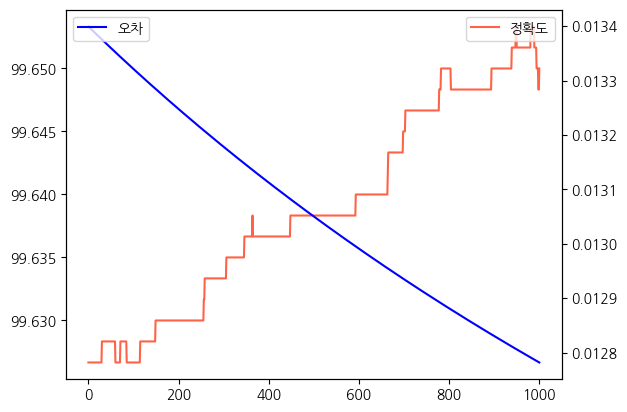

In [104]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

fig,ax1=plt.subplots()
ax1.plot(ac_list, color="tomato", label="정확도")
plt.legend(loc=1)
ax2=ax1.twinx()
ax2.plot(er_list, color="blue", label="오차")
plt.legend(loc=2)
plt.show()

60000